### 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings("ignore")

### 2. Data loading & Preprocessing :
#### 2-1) Data loading

In [4]:
train=pd.read_csv("dacon/train.csv")
test=pd.read_csv("dacon/test.csv")
submission=pd.read_csv("dacon/sample_submission.csv")

In [5]:
print(train.shape)
train.head(3)

(1205, 12)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [6]:
print(test.shape)
test.head(3)

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [7]:
print(submission.shape)
submission.head(3)

(50, 3)


,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


#### 2-2) Data profiles : missing values & etc. 

In [8]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [9]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

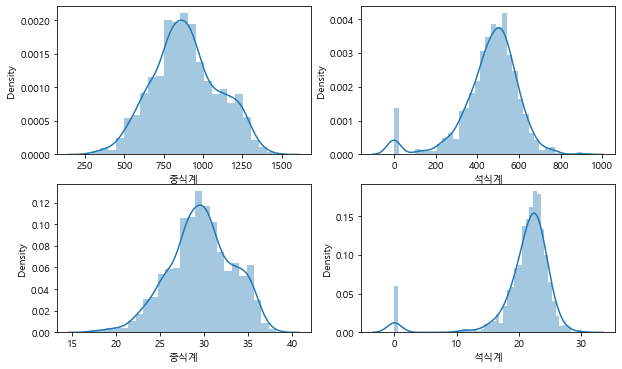

In [10]:
figure, ((a1, a2), (b1, b2))=plt.subplots(2,2)
figure.set_size_inches(10,6)

sns.distplot(train["중식계"], ax=a1)
sns.distplot(train["석식계"], ax=a2)

sns.distplot(np.sqrt(train["중식계"]), ax=b1)
sns.distplot(np.sqrt(train["석식계"]), ax=b2)

# 석식계에서 0인 값이 있다 

In [11]:
train["석식계"].describe()

count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식계, dtype: float64

In [12]:
train[train["석식계"]==0].count() ## 안먹는 사람 43

일자                43
요일                43
본사정원수             43
본사휴가자수            43
본사출장자수            43
본사시간외근무명령서승인건수    43
현본사소속재택근무자수       43
조식메뉴              43
중식메뉴              43
석식메뉴              43
중식계               43
석식계               43
dtype: int64

In [13]:
train.loc[train["석식계"]==0, "dinner_grp"]=0
train.loc[train["석식계"]!=0, "dinner_grp"]=1

In [17]:
col_tmp="YY	MM	DD	DW	WY	요일".split("\t")
train.loc[train["dinner_grp"]==0, col_tmp].head(3)

,YY,MM,DD,DW,WY,요일
204,2016,11,30,2,48,수
224,2016,12,28,2,52,수
244,2017,1,25,2,4,수


#### 2-3) Data encoding

In [14]:
train["YY"] = pd.to_datetime(train["일자"]).dt.year
train["MM"] = pd.to_datetime(train["일자"]).dt.month
train["DD"] = pd.to_datetime(train["일자"]).dt.day
train["DW"] = pd.to_datetime(train["일자"]).dt.dayofweek
train["WY"] = pd.to_datetime(train["일자"]).dt.weekofyear

In [15]:
test["YY"] = pd.to_datetime(test["일자"]).dt.year
test["MM"] = pd.to_datetime(test["일자"]).dt.month
test["DD"] = pd.to_datetime(test["일자"]).dt.day
test["DW"] = pd.to_datetime(test["일자"]).dt.dayofweek
test["WY"] = pd.to_datetime(test["일자"]).dt.weekofyear

In [16]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,dinner_grp,YY,MM,DD,DW,WY
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,1.0,2016,2,1,0,5


In [18]:
test.loc[test["요일"] == "수", col_tmp] # 마지막 수요일 별도 분류 : 1/27, 2/24, 3/31

test["dinner_grp"] = 1
test.loc[(test["MM"] == 1) & (test["DD"] == 27), "dinner_grp"] = 0
test.loc[(test["MM"] == 2) & (test["DD"] == 24), "dinner_grp"] = 0
test.loc[(test["MM"] == 3) & (test["DD"] == 31), "dinner_grp"] = 0

### 3. Analysis :
#### 3-1) Visualization

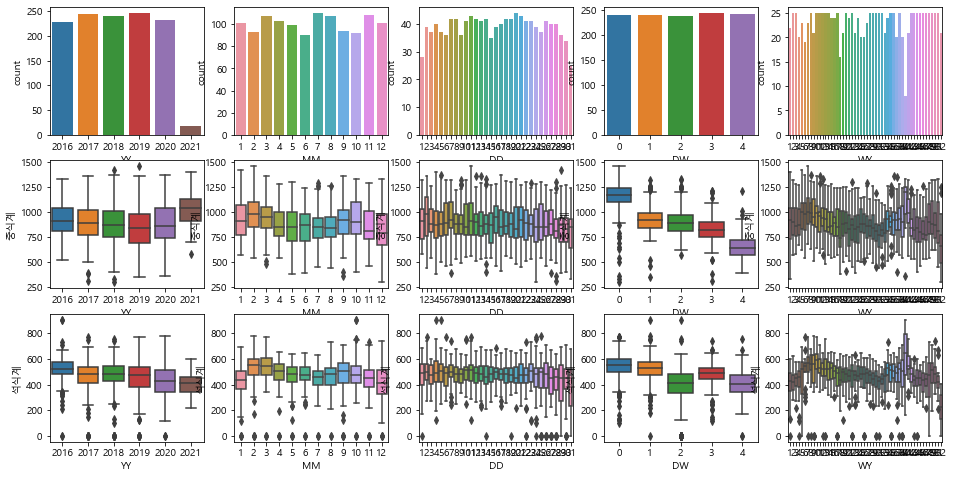

In [19]:
figure, ax = plt.subplots(3,5)
figure.set_size_inches(16,8)

sns.countplot(data=train, x='YY', ax=ax[0,0])
sns.countplot(data=train, x='MM', ax=ax[0,1])
sns.countplot(data=train, x='DD', ax=ax[0,2])
sns.countplot(data=train, x='DW', ax=ax[0,3])
sns.countplot(data=train, x='WY', ax=ax[0,4])

sns.boxplot(data=train, x='YY', y='중식계', ax=ax[1,0])
sns.boxplot(data=train, x='MM', y='중식계', ax=ax[1,1])
sns.boxplot(data=train, x='DD', y='중식계', ax=ax[1,2])
sns.boxplot(data=train, x='DW', y='중식계', ax=ax[1,3])
sns.boxplot(data=train, x='WY', y='중식계', ax=ax[1,4])

sns.boxplot(data=train, x='YY', y='석식계', ax=ax[2,0])
sns.boxplot(data=train, x='MM', y='석식계', ax=ax[2,1])
sns.boxplot(data=train, x='DD', y='석식계', ax=ax[2,2])
sns.boxplot(data=train, x='DW', y='석식계', ax=ax[2,3])
sns.boxplot(data=train, x='WY', y='석식계', ax=ax[2,4])

In [20]:
p_col = "본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수".split(",")
train[p_col].head(3)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,2601,50,150,238,0.0
1,2601,50,173,319,0.0
2,2601,56,180,111,0.0


In [21]:
train["식사대상수"] = train["본사정원수"] - train["본사휴가자수"] - train["본사출장자수"] - train["현본사소속재택근무자수"]
train["rate1"] = (train["본사정원수"] - train["식사대상수"]) / train["본사정원수"]
train["rate2"] = train["본사시간외근무명령서승인건수"] / train["식사대상수"]

In [34]:
test["식사대상수"] = test["본사정원수"] - test["본사휴가자수"] - test["본사출장자수"] - test["현본사소속재택근무자수"]
test["rate1"] = (test["본사정원수"] - test["식사대상수"]) / test["본사정원수"]
test["rate2"] = test["본사시간외근무명령서승인건수"] / test["식사대상수"]

#### 3-2) Correlation analysis

In [22]:
train.corr()[["중식계","석식계"]]

,중식계,석식계
본사정원수,-0.115529,-0.173852
본사휴가자수,-0.391975,-0.316894
본사출장자수,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.535611,0.571168
현본사소속재택근무자수,0.076509,-0.057534
중식계,1.000000,0.508287
석식계,0.508287,1.000000
dinner_grp,0.028249,0.638506
YY,-0.078804,-0.194792
MM,-0.154664,-0.127142


In [23]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
본사정원수,1205.0,2807.815768,171.264404,2601.000000,2645.000000,2760.000000,2962.000000,3305.000000
본사휴가자수,1205.0,157.913693,144.190572,23.000000,71.000000,105.000000,185.000000,1224.000000
본사출장자수,1205.0,241.142739,43.532298,41.000000,217.000000,245.000000,272.000000,378.000000
본사시간외근무명령서승인건수,1205.0,274.117012,246.239651,0.000000,4.000000,299.000000,452.000000,1044.000000
현본사소속재택근무자수,1205.0,43.506224,109.937400,0.000000,0.000000,0.000000,0.000000,533.000000
중식계,1205.0,890.334440,209.505057,296.000000,758.000000,879.000000,1032.000000,1459.000000
석식계,1205.0,461.772614,139.179202,0.000000,406.000000,483.000000,545.000000,905.000000
dinner_grp,1205.0,0.964315,0.185580,0.000000,1.000000,1.000000,1.000000,1.000000
YY,1205.0,2018.052282,1.433958,2016.000000,2017.000000,2018.000000,2019.000000,2021.000000
MM,1205.0,6.512033,3.453906,1.000000,4.000000,7.000000,9.000000,12.000000


#### 3-3) 중식계, 석식계 

In [24]:
count=len(train)
lunch=[]

for i in range(0, count):
    m=train.loc[i,"중식메뉴"].split(" ")
    r=[]
    for n in m:
        if len(n)>1 and "(" not in n:
            r.append(n)
    lunch.append(r[:3])
    
lunch[:10]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김'],
 ['카레덮밥', '팽이장국', '치킨핑거'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정'],
 ['쌀밥/잡곡밥', '시래기국', '훈제오리구이'],
 ['쌀밥/잡곡밥', '꽃게탕', '돈육굴소스볶음'],
 ['쌀밥/잡곡밥', '시금치국', '닭감자조림'],
 ['쌀밥/잡곡밥', '쇠고기무국', '탕수어'],
 ['쌀밥/잡곡밥', '냉이된장국', '쇠고기장조림']]

In [25]:
cnt = len(train)
dinner = []
for i in range(0, cnt):
    m = train.loc[i, "석식메뉴"].split(" ")
#     print(m)
    r = []
    for n in m:    
        if len(n) > 1 and "(" not in n:
            r.append(n)
    if len(r) > 3:
        dinner.append(r[0:3])
    
dinner[0:10]  

[['쌀밥/잡곡밥', '육개장', '자반고등어구이'],
 ['콩나물밥*양념장', '어묵국', '유산슬'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비'],
 ['참치회덮밥', '맑은국', '군만두'],
 ['쌀밥/잡곡밥', '김치콩나물국', '미니함박'],
 ['쌀밥/잡곡밥', '홍합미역국', '등갈비김치찜'],
 ['쌀밥/잡곡밥', '된장찌개', '쇠불고기'],
 ['볶음밥*자장소스', '맑은국', '새우또띠아']]

### 4. Modeling :
#### 4-1) Feature selection

In [26]:
# train에서도 중식계와 석식계를 나누어 설정

f_names_l = ["DW", '본사휴가자수', "rate1", '본사출장자수','본사시간외근무명령서승인건수',"WY"]

f_label_l = '중식계'

In [27]:
f_names_d = ["dinner_grp",'본사시간외근무명령서승인건수','본사휴가자수',"rate1",'본사출장자수','YY','WY']
    
f_label_d = '석식계'

In [28]:
X_train_l=train[f_names_l]
y_train_l=train[f_label_l]

In [29]:
X_train_d=train[f_names_d]
y_train_d=train[f_label_d]

In [35]:
X_test_l = test[f_names_l]
X_test_d = test[f_names_d]

#### 4-2) Models : RandomForest & etc

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf_reg_l=RandomForestRegressor(random_state=50)
rf_reg_d=RandomForestRegressor(random_state=50)

In [38]:
rf_reg_l.fit(X_train_l, y_train_l)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [40]:
pred_l=rf_reg_l.predict(X_test_l)
pred_l

array([1037.5, 1038.1,  559.7, 1208.1, 1092.4, 1066.8, 1013.7,  592.1,
       1313. , 1017.5,  639.1, 1230.5, 1048.6, 1005.1,  860. ,  613.7,
       1239.5,  989.8,  898.2,  863.4,  567.4, 1014.1,  983.5,  956.8,
        625.2, 1298.7, 1164.7, 1145.9,  920.8,  646.7, 1228.5,  997.8,
       1017.2,  904.3,  585.8, 1236.7,  960.8,  873.5,  796.1,  576.9,
       1184.8,  987.1,  963.9,  807.7,  585.6, 1176.8, 1027.1,  942.9,
        895.3,  604.1])

In [41]:
rf_reg_d.fit(X_train_d, y_train_d)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=50, verbose=0,
                      warm_start=False)

In [42]:
pred_d=rf_reg_d.predict(X_test_d)

pred_d

array([  0. , 407.1, 233.6, 487.5, 342.5, 414.5, 413.7, 347.1, 534.6,
       450.1, 239.9, 698.8, 618.4, 440.8, 474.8, 353.7, 640. , 600.9,
         0. , 464.8, 255.5, 626.6, 469.2, 507.4, 385.3, 644.4, 627.2,
       464. , 530.9, 269.4, 677.3, 520.7, 448.1, 456.3, 267.6, 598.9,
       582. , 402. , 383.9, 238.5, 620. , 569. ,   0. , 388.8, 261.3,
       613.2, 571.7, 397.3, 455.8, 259.2])

#### 4-3) Models : Catboost

In [43]:
from catboost import CatBoostRegressor

In [44]:
cb_reg_l=CatBoostRegressor(random_state=50, use_best_model=None)
cb_reg_d=CatBoostRegressor(random_state=50, use_best_model=None)

In [45]:
cb_reg_l.fit(X_train_l, y_train_l)

Learning rate set to 0.042167
0:	learn: 203.6940282	total: 154ms	remaining: 2m 33s
1:	learn: 198.1024085	total: 156ms	remaining: 1m 18s
2:	learn: 193.0932600	total: 159ms	remaining: 52.7s
3:	learn: 187.9232127	total: 161ms	remaining: 40s
4:	learn: 183.1939554	total: 163ms	remaining: 32.4s
5:	learn: 178.5304828	total: 165ms	remaining: 27.4s
6:	learn: 174.1557779	total: 168ms	remaining: 23.8s
7:	learn: 170.0674558	total: 170ms	remaining: 21.1s
8:	learn: 166.2814724	total: 173ms	remaining: 19.1s
9:	learn: 162.9090258	total: 175ms	remaining: 17.3s
10:	learn: 159.2414502	total: 177ms	remaining: 15.9s
11:	learn: 156.0939763	total: 180ms	remaining: 14.8s
12:	learn: 152.9426919	total: 182ms	remaining: 13.8s
13:	learn: 150.1742539	total: 184ms	remaining: 13s
14:	learn: 147.1664588	total: 186ms	remaining: 12.2s
15:	learn: 144.4229798	total: 189ms	remaining: 11.6s
16:	learn: 141.5886586	total: 192ms	remaining: 11.1s
17:	learn: 139.3454246	total: 195ms	remaining: 10.6s
18:	learn: 136.8423919	total

230:	learn: 74.6942118	total: 628ms	remaining: 2.09s
231:	learn: 74.5525247	total: 630ms	remaining: 2.08s
232:	learn: 74.4850852	total: 632ms	remaining: 2.08s
233:	learn: 74.4570887	total: 634ms	remaining: 2.07s
234:	learn: 74.3349602	total: 636ms	remaining: 2.07s
235:	learn: 74.2873277	total: 638ms	remaining: 2.06s
236:	learn: 74.2612022	total: 640ms	remaining: 2.06s
237:	learn: 74.1911371	total: 642ms	remaining: 2.06s
238:	learn: 74.1223491	total: 644ms	remaining: 2.05s
239:	learn: 74.0831028	total: 662ms	remaining: 2.1s
240:	learn: 74.0656236	total: 665ms	remaining: 2.09s
241:	learn: 74.0354903	total: 667ms	remaining: 2.09s
242:	learn: 73.9082453	total: 669ms	remaining: 2.08s
243:	learn: 73.8767139	total: 676ms	remaining: 2.09s
244:	learn: 73.8457988	total: 678ms	remaining: 2.09s
245:	learn: 73.7634406	total: 680ms	remaining: 2.08s
246:	learn: 73.6770422	total: 683ms	remaining: 2.08s
247:	learn: 73.6325785	total: 685ms	remaining: 2.08s
248:	learn: 73.5436986	total: 689ms	remaining: 

431:	learn: 62.7752373	total: 1.09s	remaining: 1.43s
432:	learn: 62.7482586	total: 1.09s	remaining: 1.43s
433:	learn: 62.7343253	total: 1.09s	remaining: 1.42s
434:	learn: 62.6562956	total: 1.09s	remaining: 1.42s
435:	learn: 62.6037136	total: 1.09s	remaining: 1.42s
436:	learn: 62.5844677	total: 1.1s	remaining: 1.41s
437:	learn: 62.5723719	total: 1.1s	remaining: 1.41s
438:	learn: 62.5032255	total: 1.1s	remaining: 1.41s
439:	learn: 62.4824270	total: 1.1s	remaining: 1.4s
440:	learn: 62.4023538	total: 1.1s	remaining: 1.4s
441:	learn: 62.3036160	total: 1.12s	remaining: 1.42s
442:	learn: 62.2260275	total: 1.13s	remaining: 1.42s
443:	learn: 62.2164801	total: 1.13s	remaining: 1.42s
444:	learn: 62.2078303	total: 1.14s	remaining: 1.42s
445:	learn: 62.1360594	total: 1.14s	remaining: 1.42s
446:	learn: 62.0600731	total: 1.14s	remaining: 1.41s
447:	learn: 62.0014503	total: 1.15s	remaining: 1.41s
448:	learn: 61.9551289	total: 1.15s	remaining: 1.41s
449:	learn: 61.9302206	total: 1.15s	remaining: 1.41s


643:	learn: 54.0315651	total: 1.55s	remaining: 856ms
644:	learn: 54.0116621	total: 1.55s	remaining: 854ms
645:	learn: 53.9935462	total: 1.55s	remaining: 851ms
646:	learn: 53.9631330	total: 1.55s	remaining: 848ms
647:	learn: 53.9591068	total: 1.56s	remaining: 846ms
648:	learn: 53.9519978	total: 1.56s	remaining: 843ms
649:	learn: 53.9142420	total: 1.56s	remaining: 841ms
650:	learn: 53.9109466	total: 1.56s	remaining: 838ms
651:	learn: 53.8725601	total: 1.56s	remaining: 835ms
652:	learn: 53.8408058	total: 1.57s	remaining: 833ms
653:	learn: 53.7914652	total: 1.57s	remaining: 830ms
654:	learn: 53.7563721	total: 1.57s	remaining: 828ms
655:	learn: 53.6933432	total: 1.57s	remaining: 826ms
656:	learn: 53.6591893	total: 1.58s	remaining: 823ms
657:	learn: 53.6202662	total: 1.58s	remaining: 820ms
658:	learn: 53.5653786	total: 1.58s	remaining: 818ms
659:	learn: 53.5479813	total: 1.58s	remaining: 815ms
660:	learn: 53.5098207	total: 1.58s	remaining: 812ms
661:	learn: 53.4712166	total: 1.59s	remaining:

872:	learn: 46.7929563	total: 2.01s	remaining: 292ms
873:	learn: 46.7788874	total: 2.01s	remaining: 290ms
874:	learn: 46.7465748	total: 2.01s	remaining: 288ms
875:	learn: 46.6941945	total: 2.02s	remaining: 285ms
876:	learn: 46.6749023	total: 2.02s	remaining: 283ms
877:	learn: 46.6521580	total: 2.02s	remaining: 281ms
878:	learn: 46.6349707	total: 2.02s	remaining: 278ms
879:	learn: 46.5906284	total: 2.02s	remaining: 276ms
880:	learn: 46.5530657	total: 2.02s	remaining: 274ms
881:	learn: 46.5355955	total: 2.03s	remaining: 271ms
882:	learn: 46.5158231	total: 2.03s	remaining: 269ms
883:	learn: 46.4582880	total: 2.03s	remaining: 267ms
884:	learn: 46.4508248	total: 2.04s	remaining: 265ms
885:	learn: 46.4362023	total: 2.04s	remaining: 262ms
886:	learn: 46.4341915	total: 2.04s	remaining: 260ms
887:	learn: 46.4177705	total: 2.04s	remaining: 257ms
888:	learn: 46.4016254	total: 2.04s	remaining: 255ms
889:	learn: 46.3843095	total: 2.04s	remaining: 253ms
890:	learn: 46.3417235	total: 2.05s	remaining:

In [46]:
cb_reg_d.fit(X_train_d, y_train_d)

Learning rate set to 0.042167
0:	learn: 136.0472183	total: 2.12ms	remaining: 2.12s
1:	learn: 132.7525161	total: 3.46ms	remaining: 1.73s
2:	learn: 129.6617894	total: 5.48ms	remaining: 1.82s
3:	learn: 126.7762171	total: 7.57ms	remaining: 1.88s
4:	learn: 123.8770209	total: 10.4ms	remaining: 2.08s
5:	learn: 121.2758480	total: 13ms	remaining: 2.16s
6:	learn: 118.7584616	total: 15.4ms	remaining: 2.18s
7:	learn: 116.2972203	total: 17.7ms	remaining: 2.19s
8:	learn: 113.9480276	total: 19.8ms	remaining: 2.18s
9:	learn: 111.6450342	total: 22.5ms	remaining: 2.23s
10:	learn: 109.6235050	total: 24.9ms	remaining: 2.24s
11:	learn: 107.4655155	total: 27.1ms	remaining: 2.23s
12:	learn: 105.5170859	total: 29ms	remaining: 2.21s
13:	learn: 103.5731855	total: 31.5ms	remaining: 2.21s
14:	learn: 101.7298503	total: 33.9ms	remaining: 2.23s
15:	learn: 100.0778150	total: 36.4ms	remaining: 2.24s
16:	learn: 98.4860748	total: 38.6ms	remaining: 2.23s
17:	learn: 96.9220210	total: 41ms	remaining: 2.23s
18:	learn: 95.39

225:	learn: 47.7792285	total: 463ms	remaining: 1.58s
226:	learn: 47.6938381	total: 466ms	remaining: 1.59s
227:	learn: 47.6507908	total: 468ms	remaining: 1.58s
228:	learn: 47.5533237	total: 471ms	remaining: 1.58s
229:	learn: 47.4786772	total: 472ms	remaining: 1.58s
230:	learn: 47.4440056	total: 475ms	remaining: 1.58s
231:	learn: 47.3995297	total: 477ms	remaining: 1.58s
232:	learn: 47.3296904	total: 479ms	remaining: 1.58s
233:	learn: 47.2747712	total: 482ms	remaining: 1.58s
234:	learn: 47.2160783	total: 484ms	remaining: 1.57s
235:	learn: 47.1465422	total: 486ms	remaining: 1.57s
236:	learn: 47.1186158	total: 489ms	remaining: 1.57s
237:	learn: 47.0863049	total: 493ms	remaining: 1.58s
238:	learn: 47.0300018	total: 495ms	remaining: 1.57s
239:	learn: 46.9890883	total: 497ms	remaining: 1.57s
240:	learn: 46.9200429	total: 499ms	remaining: 1.57s
241:	learn: 46.8608154	total: 501ms	remaining: 1.57s
242:	learn: 46.7778847	total: 504ms	remaining: 1.57s
243:	learn: 46.7320573	total: 506ms	remaining:

437:	learn: 38.4885456	total: 918ms	remaining: 1.18s
438:	learn: 38.4473925	total: 920ms	remaining: 1.18s
439:	learn: 38.4391752	total: 922ms	remaining: 1.17s
440:	learn: 38.4154812	total: 924ms	remaining: 1.17s
441:	learn: 38.3755657	total: 927ms	remaining: 1.17s
442:	learn: 38.3537878	total: 929ms	remaining: 1.17s
443:	learn: 38.3242658	total: 931ms	remaining: 1.17s
444:	learn: 38.3084857	total: 933ms	remaining: 1.16s
445:	learn: 38.2701362	total: 935ms	remaining: 1.16s
446:	learn: 38.2399204	total: 937ms	remaining: 1.16s
447:	learn: 38.2156389	total: 939ms	remaining: 1.16s
448:	learn: 38.1626423	total: 941ms	remaining: 1.15s
449:	learn: 38.1254614	total: 943ms	remaining: 1.15s
450:	learn: 38.0788413	total: 946ms	remaining: 1.15s
451:	learn: 38.0515689	total: 948ms	remaining: 1.15s
452:	learn: 38.0152683	total: 951ms	remaining: 1.15s
453:	learn: 37.9876104	total: 953ms	remaining: 1.15s
454:	learn: 37.9539427	total: 956ms	remaining: 1.14s
455:	learn: 37.9149164	total: 958ms	remaining:

632:	learn: 32.8013724	total: 1.37s	remaining: 793ms
633:	learn: 32.7896138	total: 1.37s	remaining: 791ms
634:	learn: 32.7789398	total: 1.37s	remaining: 788ms
635:	learn: 32.7433068	total: 1.37s	remaining: 786ms
636:	learn: 32.7189415	total: 1.38s	remaining: 784ms
637:	learn: 32.7018420	total: 1.38s	remaining: 781ms
638:	learn: 32.6778238	total: 1.38s	remaining: 779ms
639:	learn: 32.6514008	total: 1.38s	remaining: 777ms
640:	learn: 32.6432610	total: 1.38s	remaining: 775ms
641:	learn: 32.6213847	total: 1.39s	remaining: 773ms
642:	learn: 32.6068107	total: 1.39s	remaining: 771ms
643:	learn: 32.5930462	total: 1.39s	remaining: 769ms
644:	learn: 32.5662358	total: 1.39s	remaining: 766ms
645:	learn: 32.5469764	total: 1.39s	remaining: 764ms
646:	learn: 32.5215352	total: 1.4s	remaining: 762ms
647:	learn: 32.4952150	total: 1.4s	remaining: 760ms
648:	learn: 32.4681087	total: 1.4s	remaining: 758ms
649:	learn: 32.4382734	total: 1.4s	remaining: 756ms
650:	learn: 32.4137285	total: 1.41s	remaining: 753

832:	learn: 28.9506474	total: 1.82s	remaining: 365ms
833:	learn: 28.9419481	total: 1.82s	remaining: 362ms
834:	learn: 28.9201058	total: 1.82s	remaining: 360ms
835:	learn: 28.9132275	total: 1.82s	remaining: 358ms
836:	learn: 28.8899344	total: 1.83s	remaining: 356ms
837:	learn: 28.8765257	total: 1.83s	remaining: 354ms
838:	learn: 28.8682588	total: 1.83s	remaining: 351ms
839:	learn: 28.8269705	total: 1.83s	remaining: 349ms
840:	learn: 28.8063149	total: 1.83s	remaining: 347ms
841:	learn: 28.8048162	total: 1.84s	remaining: 345ms
842:	learn: 28.7859785	total: 1.84s	remaining: 343ms
843:	learn: 28.7764344	total: 1.84s	remaining: 340ms
844:	learn: 28.7713589	total: 1.84s	remaining: 338ms
845:	learn: 28.7555753	total: 1.84s	remaining: 336ms
846:	learn: 28.7423512	total: 1.85s	remaining: 334ms
847:	learn: 28.7311933	total: 1.85s	remaining: 331ms
848:	learn: 28.7096507	total: 1.85s	remaining: 329ms
849:	learn: 28.6844035	total: 1.85s	remaining: 327ms
850:	learn: 28.6630990	total: 1.86s	remaining:

In [48]:
pred_cb_l=cb_reg_l.predict(X_test_l)

In [49]:
pred_cb_d=cb_reg_d.predict(X_test_d)

### 5. Validation & Tuning :
#### 5-1) Validation test

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [51]:
kfold=KFold(n_splits=5, shuffle=False, random_state=None)

In [52]:
for f, v in kfold.split(X_train_l):
    X_train_l_fit = X_train_l.iloc[f]
    y_train_l_fit = y_train_l.iloc[f]   
    
    X_train_l_val = X_train_l.iloc[v]
    y_train_l_val = y_train_l.iloc[v]
    
    cb_reg_l.fit(X_train_l_fit, y_train_l_fit, eval_set=(X_train_l_val, y_train_l_val), 
                 use_best_model=True, verbose=False)
    pred_l = cb_reg_l.predict(X_train_l_val)
    
    print(mean_absolute_error(y_train_l_val, pred_l))

69.10568685874183
63.24925501494567
71.4768080882858
78.58466914819806
106.85813252829206


#### 5-2) Feature importances

In [53]:
pd.DataFrame(cb_reg_l.feature_importances_, 
             index=X_train_l.columns, columns=["Lunch"]).sort_values(by='Lunch', ascending=False)

,Lunch
DW,33.447529
rate1,17.918460
WY,15.495647
본사출장자수,15.338883
본사시간외근무명령서승인건수,10.222189
본사휴가자수,7.577291


In [54]:
pd.DataFrame(cb_reg_d.feature_importances_, 
             index=X_train_d.columns, columns=["Dinner"]).sort_values(by='Dinner', ascending=False)

,Dinner
dinner_grp,30.583436
본사시간외근무명령서승인건수,21.470072
WY,12.644199
YY,10.125462
본사출장자수,8.628027
rate1,8.502077
본사휴가자수,8.046726


#### 5-2) Tune

### 6. Submission

In [55]:
submission["중식계"]=pred_cb_l
submission["석식계"]=pred_cb_d

In [56]:
submission.to_csv("dacon-235743-0128.csv", index=False)